In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
le = LabelEncoder()
df["sex_idx"] = le.fit_transform(df["sex"])
df["smoker_idx"] = le.fit_transform(df["smoker"])
df["region_idx"] = le.fit_transform(df["region"])

In [12]:
df

,age,sex,bmi,children,smoker,region,charges,sex_idx,smoker_idx,region_idx
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [5]:
X = df[["age", "sex_idx", "smoker_idx", "region_idx", "bmi", "children"]]
y = df['charges']

In [6]:
polynomial = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

print("MAE: %f" % (MAE))
print("RMSE: %f" % (RMSE))

MAE: 2730.315582
RMSE: 4531.071501


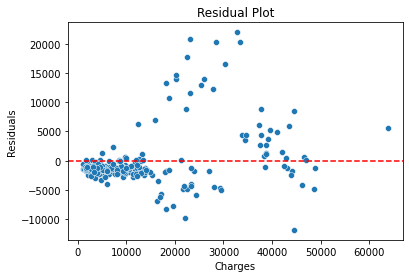

In [11]:
residuals = y_test - predictions
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()